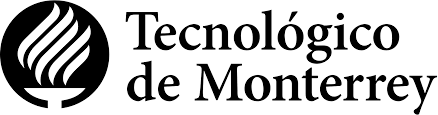

# <center>Actividad Semanal 5: Visualización</center>
## Ciencia y Analítica de datos
## Profesor Titular: María de la Paz Rico Fernández
## _Maestría en Inteligencia Artificial Aplicada (MNA-V)_

### 01/11/2022
#### _Andrés Eduardo Figueroa García - A01378536_

<a id='Instrucciones'></a>
### Instrucciones
1. Descarga los datos y carga el dataset en tu libreta. Descripción aquí. 
2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()
3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna
4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión
5. Realiza el conteo de las variables categóricas
6. Escala los datos, si consideras necesario
7. Reduce las dimensiones con PCA, si consideras necesario.
 1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
 2. Indica la importancia de las variables en cada componente
8. Elabora los histogramas de los atributos para visualizar su distribución
9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

### 0. Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### 1. Descarga los datos y carga el dataset en tu libreta. Descripción aquí. 

Se agrega la ruta desde donde se va a leer el archivo CSV para formar el DataFrame con los datos. Posteriormente, se lee el archivo utilizando pandas.

In [2]:
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df = pd.read_csv(path, index_col=0)
df.index.name = None

Se muestra el DataFrame obtenido con todas las columnas.

In [3]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


### 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

#### shape

Se verifica la cantidad de columnas y filas que se tiene el DataFram a partir del método shape.

In [4]:
size = df.shape
print("Filas: {}".format(size[0]))
print("Columnas: {}".format(size[1]))

Filas: 30000
Columnas: 24


#### columns

Se imprimen los encabezados de las columnas.

In [5]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

#### head()

Se obtiene una vista previa de las priemeras filas del DataFrame se aplica el metodo head() con el argumetno 15, a fin de ver las primeras 15 filas.

In [6]:
df.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


#### dtypes

Se obtienen los tipos que se incluyen en cada una de las columnas del DataFrame. Esto se realiza con el método dtypes.

In [7]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

#### info()

Con el método info se obtiene un resumen del nombre de las columnas, el total de datos que no son nulos y el tipo de dato.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

#### isna()

Se verifica cuáles valores dentro del DataFrame son nulos con el método isna(). 

In [9]:
df.isna()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Esto no es práctico a la hora de visualizar por columna, por lo que se opta por utilizar además de utilizar el isna(), se agrega any().

In [10]:
df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

### 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

Antes de pensar en imputar los datos por la media, se analizará el impacto que puede tener eliminar los registros nulos del DataFrame. Para esto, se obtienen el total de registros nulos y se verá el porcentaje del total de de datos.

In [11]:
m = df[df.isnull().any(axis=1)].shape[0]
t = df.shape[0]

missing = m / t * 100

print("El total de datos faltantes equivale al {:.2f}%".format(missing))

El total de datos faltantes equivale al 0.14%


Debido a que el porcentaje es de 0.14%, se decide eliminar los registros con datos faltantes.

In [12]:
ndf = df.copy()
ndf.dropna(inplace = True)

Se valida que no hayan registros con valores nulos en el DataFrame

In [13]:
ndf.isnull().values.any()

False

### 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

Antes de realizar el análisis, se cambiaran los nombres de cada variable para que coincidan con los sugeridos en el Data Description.

In [14]:
ndf.rename(columns = {'X1'  : 'credit_giv', 
                      'X2'  : 'gender', 
                      'X3'  : 'education', 
                      'X4'  : 'marital', 
                      'X5'  : 'age', 
                      'X6'  : 'repay_stat_sep', 
                      'X7'  : 'repay_stat_aug', 
                      'X8'  : 'repay_stat_jul', 
                      'X9'  : 'repay_stat_jun', 
                      'X10' : 'repay_stat_may', 
                      'X11' : 'repay_stat_apr', 
                      'X12' : 'bill_stmnt_dll_sep', 
                      'X13' : 'bill_stmnt_dll_aug', 
                      'X14' : 'bill_stmnt_dll_jul', 
                      'X15' : 'bill_stmnt_dll_jun', 
                      'X16' : 'bill_stmnt_dll_may', 
                      'X17' : 'bill_stmnt_dll_apr', 
                      'X18' : 'prev_pay_sep', 
                      'X19' : 'prev_pay_aug', 
                      'X20' : 'prev_pay_jul', 
                      'X21' : 'prev_pay_jun', 
                      'X22' : 'prev_pay_may', 
                      'X23' : 'prev_pay_apr',
                      'Y'   : 'default_pay'}, inplace = True)

Se imprime la estadística descriptiva del nuevo data frame con el método describe().

In [15]:
ndf.describe()

,credit_giv,gender,education,marital,age,repay_stat_sep,repay_stat_aug,repay_stat_jul,repay_stat_jun,repay_stat_may,repay_stat_apr,bill_stmnt_dll_sep,bill_stmnt_dll_aug,bill_stmnt_dll_jul,bill_stmnt_dll_jun,bill_stmnt_dll_may,bill_stmnt_dll_apr,prev_pay_sep,prev_pay_aug,prev_pay_jul,prev_pay_jun,prev_pay_may,prev_pay_apr,default_pay
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,-0.291575,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,1.149303,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Realizando un análisis de cada una de las variables por separado, se pueden hacer los siguientes comentarios:
* credit_giv: Esta variable muestra un valor máximo mucho más alto que al que se puede encontrar en el tercer cuartil, por lo cual se trata de un outlier que va a afectar fuertemente la desviación estándar.
* gender: Esta variable es categórica y se ve que los valores máximos y mínimos coinciden con los esperados según el Data Description.
* education: Esta variable tiene valores que están fuera de lo esperado, ya que el mínimo es de 0 y el máximo de 6, por lo que pueden existir valores de 0, 5 y 6, que no están definidos.
* marital: Esta variable muestra un valor mínimo de 0, que no está definido en el Data Description.
* age: En esta variable no se pueden apreciar ningun outlier y coincide con lo esperado en el Data Description.
* repay_stat_sep: Esta variable muestra un valor mínimo de -2 y un valor máximo de 8, lo cual es uno menos en ambos casos de lo que se esperaría de -1 a 9. 
* repay_stat_aug: Esta variable muestra un valor mínimo de -2 y un valor máximo de 8, lo cual es uno menos en ambos casos de lo que se esperaría de -1 a 9. 
* repay_stat_jul: Esta variable muestra un valor mínimo de -2 y un valor máximo de 8, lo cual es uno menos en ambos casos de lo que se esperaría de -1 a 9. 
* repay_stat_jun: Esta variable muestra un valor mínimo de -2 y un valor máximo de 8, lo cual es uno menos en ambos casos de lo que se esperaría de -1 a 9. 
* repay_stat_may: Esta variable muestra un valor mínimo de -2 y un valor máximo de 8, lo cual es uno menos en ambos casos de lo que se esperaría de -1 a 9. 
* repay_stat_apr: Esta variable muestra un valor mínimo de -2 y un valor máximo de 8, lo cual es uno menos en ambos casos de lo que se esperaría de -1 a 9. 
* bill_stmnt_dll_sep: Esta variable no tiene outliersrespecto a las otras del mismo tipo. Revisar la interpretación de los valores negativos.
* bill_stmnt_dll_aug: Esta variable no tiene outliersrespecto a las otras del mismo tipo. Revisar la interpretación de los valores negativos.
* bill_stmnt_dll_jul: Esta variable tiene outliers respecto a las otras del mismo tipo. Revisar la interpretación de los valores negativos.
* bill_stmnt_dll_jun: Esta variable no tiene outliersrespecto a las otras del mismo tipo. Revisar la interpretación de los valores negativos.
* bill_stmnt_dll_may: Esta variable no tiene outliersrespecto a las otras del mismo tipo. Revisar la interpretación de los valores negativos.
* bill_stmnt_dll_apr: Esta variable no tiene outliersrespecto a las otras del mismo tipo. Revisar la interpretación de los valores negativos.
* prev_pay_sep: Esta variable no tiene outliersrespecto a las otras del mismo tipo.
* prev_pay_aug: Esta variable tiene outliers respecto a las otras del mismo tipo.
* prev_pay_jul: Esta variable no tiene outliersrespecto a las otras del mismo tipo.
* prev_pay_jun: Esta variable no tiene outliersrespecto a las otras del mismo tipo.
* prev_pay_may: Esta variable no tiene outliersrespecto a las otras del mismo tipo.
* prev_pay_apr: Esta variable no tiene outliersrespecto a las otras del mismo tipo.
* default_pay: Esta variable no tiene valores que no estén dentro de las esperadas como parte del Data Description.

### 5. Realiza el conteo de las variables categóricas

Se imprime la cantidad por tipo de dato.

In [16]:
ndf.dtypes.value_counts()

float64    23
int64       1
dtype: int64

Como se puede ver, por default ninguna de las variables es de tipo categórico tal cual como se importaron, por lo que se asignarán los tipos a cada columna.

In [17]:
ndf = ndf.astype({'credit_giv'         : 'float64',
                  'gender'             : 'category',
                  'education'          : 'category',
                  'marital'            : 'category',
                  'age'                : 'int64',
                  'repay_stat_sep'     : 'category',
                  'repay_stat_aug'     : 'category',
                  'repay_stat_jul'     : 'category',
                  'repay_stat_jun'     : 'category',
                  'repay_stat_may'     : 'category',
                  'repay_stat_apr'     : 'category',
                  'bill_stmnt_dll_sep' : 'float64',
                  'bill_stmnt_dll_aug' : 'float64',
                  'bill_stmnt_dll_jul' : 'float64',
                  'bill_stmnt_dll_jun' : 'float64',
                  'bill_stmnt_dll_may' : 'float64',
                  'bill_stmnt_dll_apr' : 'float64',
                  'prev_pay_sep'       : 'float64',
                  'prev_pay_aug'       : 'float64',
                  'prev_pay_jul'       : 'float64',
                  'prev_pay_jun'       : 'float64',
                  'prev_pay_may'       : 'float64',
                  'prev_pay_apr'       : 'float64',
                  'default_pay'        : 'category'})

Se vuelve a desplegar la cantidad de tipo de datos en las columnas, pero se puede observar que las variables categóricas se separan a su vez por la cantidad de categorías que contienen.

In [18]:
ndf.dtypes.value_counts()

float64     13
category     4
category     2
category     1
category     1
category     1
int64        1
category     1
dtype: int64

Se corrige agregando el valor astype(str) de manera intermedia.

In [19]:
ndf.dtypes.astype(str).value_counts()

float64     13
category    10
int64        1
dtype: int64

### 6. Escala los datos, si consideras necesario

Debido a que se va a implementar PCA, se considera necesario realizar un escalamiento de las variables que no son categóricas. Para eso se va a implementar un Pipeline que incluya un Column Transformer. Para eso, se obtendrán los nombres de las columnas por cada tipo de variable y, posteriormente, se juntarán aquellas de tipo float64 e int64 en una lista llamada quantitative_features.

In [20]:
float64  = ndf.columns[np.array(ndf.dtypes.astype(str)=='float64')]
int64    = ndf.columns[np.array(ndf.dtypes.astype(str)=='int64')]
category = ndf.columns[np.array(ndf.dtypes.astype(str)=='category')]

In [21]:
quantitative_features = [*float64, *int64]

quantitative_transformer = Pipeline(
    [
     ('scaler', MinMaxScaler())
    ]
)


preprocessor = ColumnTransformer(
        transformers = [
            ('quantitative_transformer', quantitative_transformer, quantitative_features)
        ], remainder='passthrough'
)

sdf = preprocessor.fit_transform(ndf)

new_columns = [*quantitative_features, *category]
sdf = pd.DataFrame(sdf, columns=new_columns)
sdf = sdf.drop(["default_pay"], axis=1)

### 7. Reduce las dimensiones con PCA, si consideras necesario.

#### a. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

Se define el PCA a utilizar y se aplica con el conjunto de datos escalados, eliminando la variable de salida 'default_pay'.

In [22]:
pcs = PCA()

pcs.fit(sdf) 

PCA()

Se convierten los resultados del PCA en un Data Frame y se despliegan estos en un tabla.

In [23]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Variance': pcs.explained_variance_,
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,2.4156,0.9607,0.7902,0.7380,0.6029,0.5179,0.5161,0.4867,0.4238,0.1543,0.1357,0.0930,0.0367,0.0332,0.0317,0.0245,0.0208,0.0186,0.0155,0.0120,0.0104,0.0086,0.0062
Variance,5.8351,0.9229,0.6243,0.5447,0.3635,0.2682,0.2663,0.2368,0.1796,0.0238,0.0184,0.0087,0.0013,0.0011,0.0010,0.0006,0.0004,0.0003,0.0002,0.0001,0.0001,0.0001,0.0000
Proportion of variance,0.6276,0.0993,0.0671,0.0586,0.0391,0.0288,0.0286,0.0255,0.0193,0.0026,0.0020,0.0009,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.6276,0.7268,0.7940,0.8526,0.8917,0.9205,0.9491,0.9746,0.9939,0.9965,0.9985,0.9994,0.9996,0.9997,0.9998,0.9999,0.9999,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000


Se observa que los elementos hasta el PC6 cubre con el requisito que se pide en que la Varianza acumulada es mayor al 70%

#### b. Indica la importancia de las variables en cada componente

Se muestra la importancia de cada componente entre el PC1 al PC6

In [24]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=sdf.columns
                                )
pcsComponents_df.iloc[:,:6].T

,credit_giv,bill_stmnt_dll_sep,bill_stmnt_dll_aug,bill_stmnt_dll_jul,bill_stmnt_dll_jun,bill_stmnt_dll_may,bill_stmnt_dll_apr,prev_pay_sep,prev_pay_aug,prev_pay_jul,prev_pay_jun,prev_pay_may,prev_pay_apr,age,gender,education,marital,repay_stat_sep,repay_stat_aug,repay_stat_jul,repay_stat_jun,repay_stat_may,repay_stat_apr
PC1,-0.017315,0.006645,0.007422,0.004242,0.006995,0.007033,0.005246,-0.000260,-0.000228,-0.000379,-0.000493,-0.000705,-0.000557,-0.003711,-0.014574,0.045296,0.007581,0.337382,0.421603,0.437748,0.433677,0.412365,0.394716
PC2,0.012723,-0.001691,-0.000301,0.001259,0.003901,0.004625,0.003348,0.001913,0.001275,0.001628,0.001364,0.000741,0.001331,-0.003689,0.014843,-0.098202,0.018539,-0.604984,-0.436536,-0.117737,0.232901,0.396198,0.455967
PC3,-0.025377,-0.001045,-0.001433,-0.000895,-0.002412,-0.002958,-0.002330,-0.000440,-0.000237,-0.000671,-0.000840,-0.001331,-0.001085,0.046652,0.028124,0.974242,-0.172147,-0.121277,-0.041701,0.003368,0.028867,0.013856,-0.009681
PC4,0.002622,-0.000834,0.000406,-0.000367,-0.002394,-0.003841,-0.002629,0.001154,-0.000276,-0.000761,-0.000200,0.001776,0.001080,-0.004700,-0.016019,-0.071065,0.017505,-0.625272,0.262896,0.572836,0.176778,-0.185242,-0.374884
PC5,0.000693,-0.005671,-0.003765,-0.001171,-0.003526,-0.005922,-0.004513,0.001232,0.000313,-0.002284,-0.002750,0.000094,-0.000524,-0.000325,-0.003250,-0.008364,0.010747,0.301426,-0.581697,0.128707,0.573910,0.058946,-0.470139
PC6,0.009688,0.002845,-0.000439,0.001236,0.001954,-0.000700,-0.000605,-0.002420,0.001581,-0.000163,-0.002418,0.001703,0.001363,0.023325,-0.050701,-0.046930,-0.183375,-0.146592,0.449117,-0.606981,0.319997,0.344436,-0.385063


### 8. Elabora los histogramas de los atributos para visualizar su distribución

Se imprimen los histogramas para 

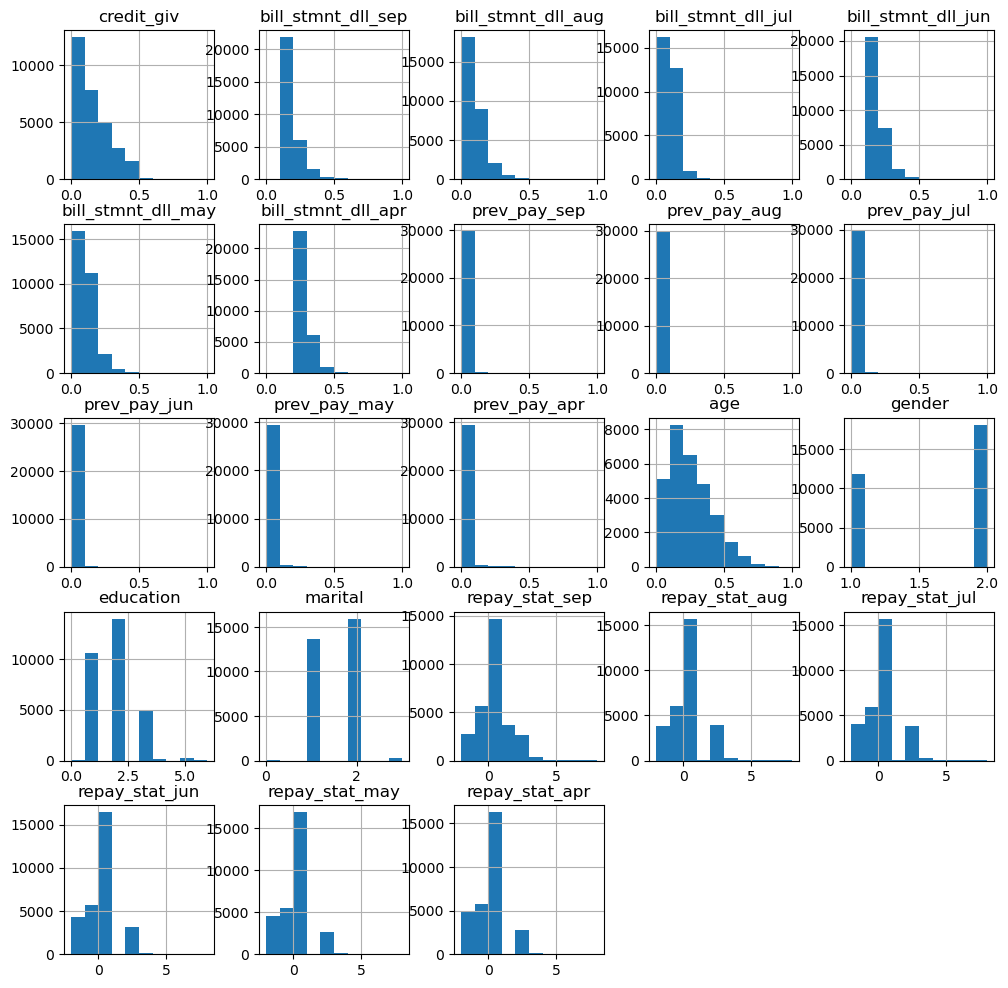

In [25]:
hist = sdf.hist(figsize=(12,12))

### 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

#### a. Gráfica 1

Se incluye un BoxPlot para los datos cuantitativos ya escalados.

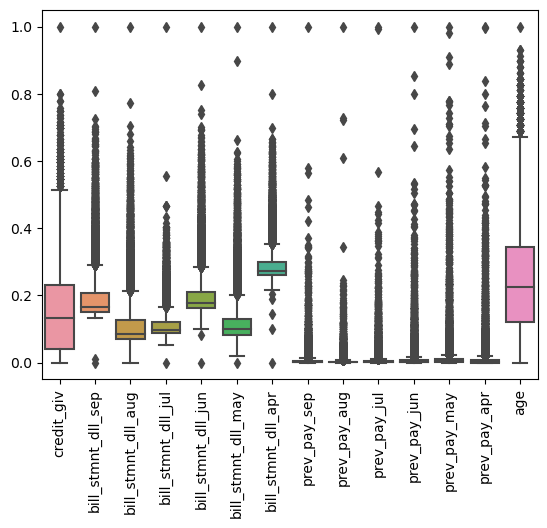

In [26]:
plt.xticks(rotation = 'vertical')
g = sns.boxplot(data=sdf[quantitative_features])

#### b. Gráfica 2

Se realiza además un PairPlot para los 6 principales elementos del PC1.

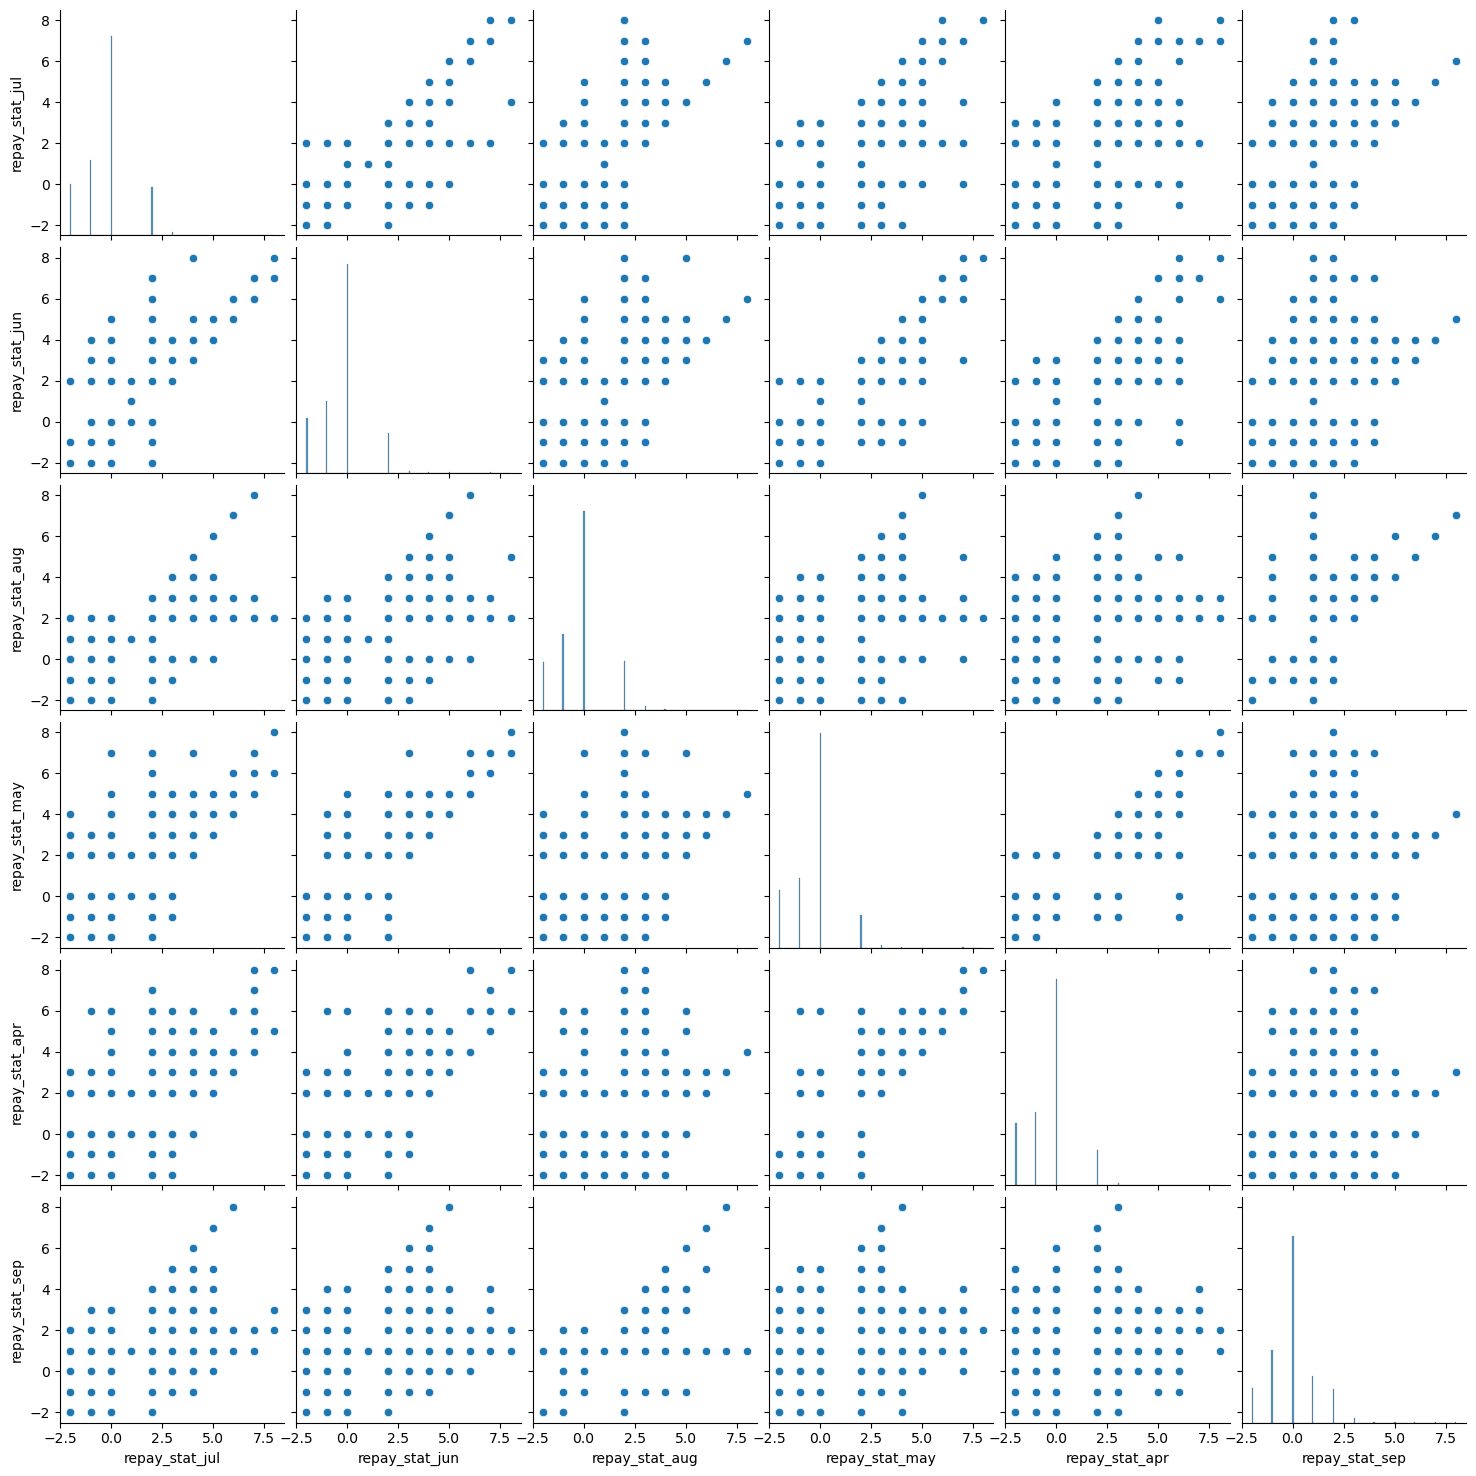

In [27]:
LargestFeaturesPC1 = pcsComponents_df.PC1.abs().nlargest(6).index
PairPlot = sns.pairplot(sdf[LargestFeaturesPC1],diag_kind="hist")

#### c. Gráfica 3

Se incluye un ScreePlot como una combinación de BarPlot y LinePlot sobre las varianzas y varianzas acumuladas de los PCs

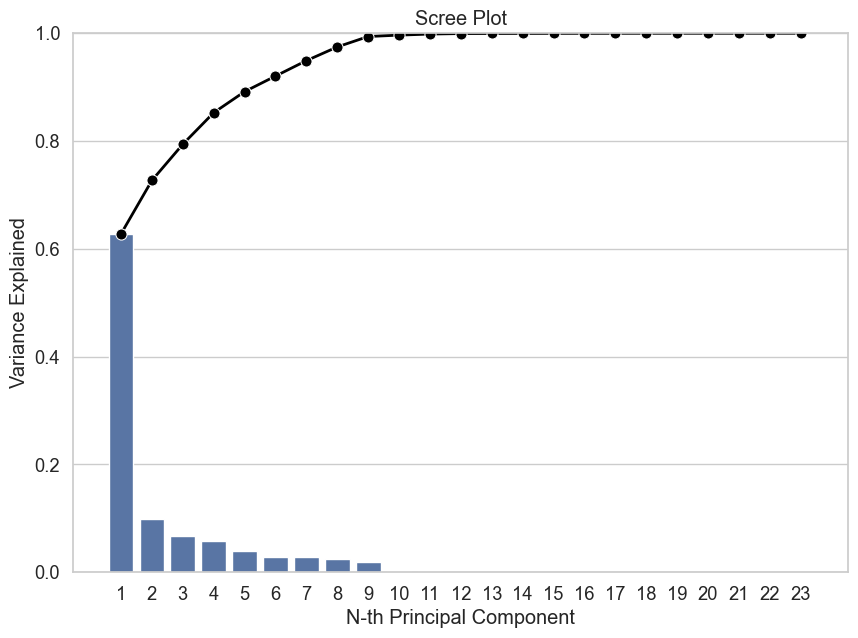

In [28]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )
#### c. Gráfica 3
fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

#### d. Gráfica 4

Se incluye un heatmap de la correlación entre todas las variables de entrada.

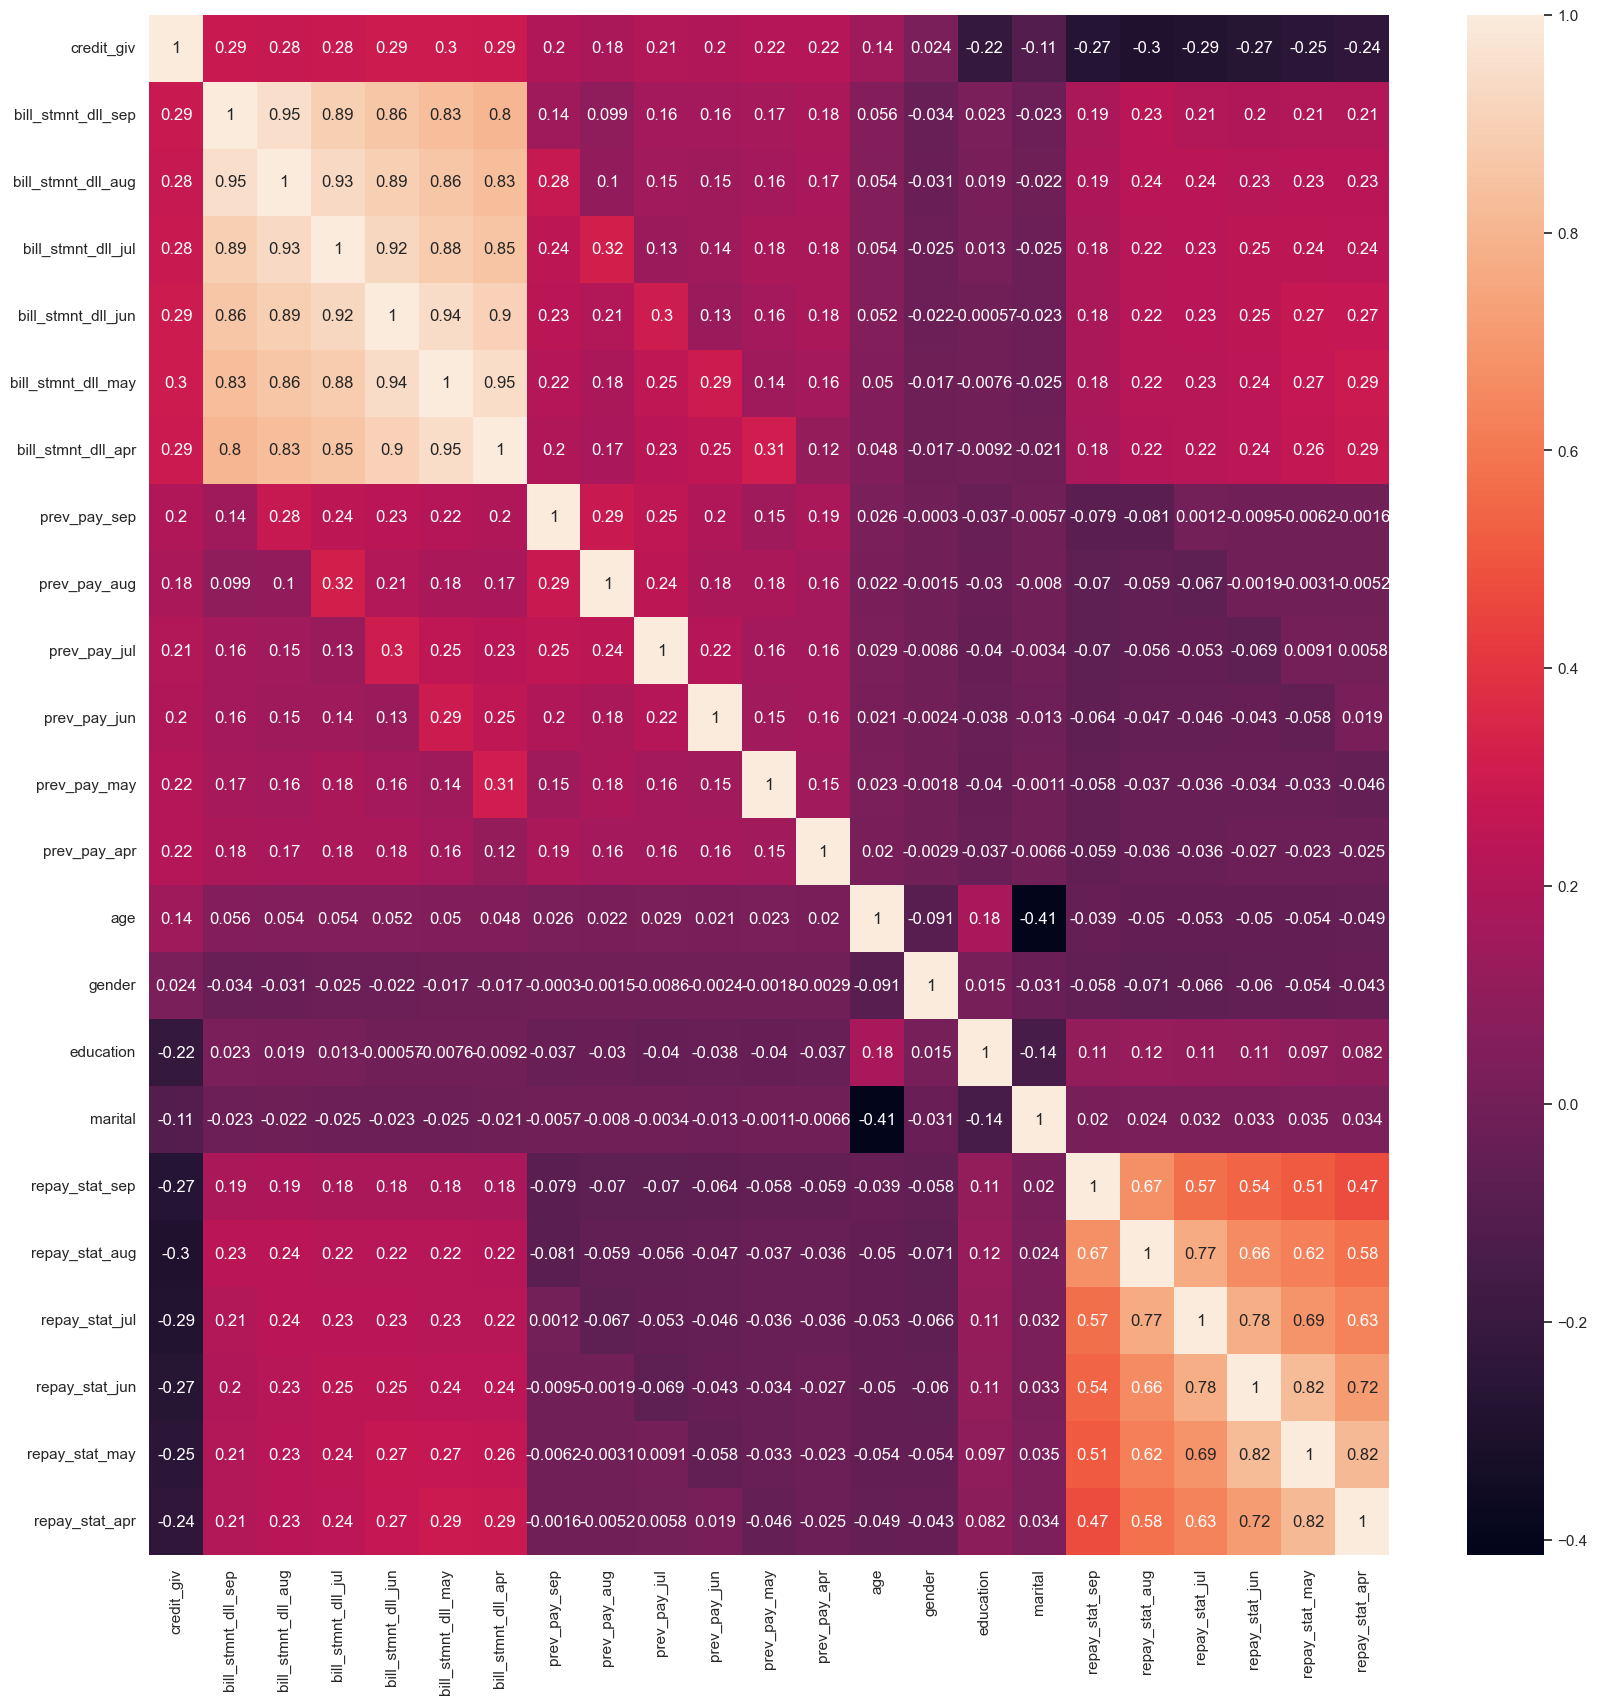

In [29]:
sns.set(rc={'figure.figsize':(20,20)}) 
CorrM = sdf.corr(method ='pearson')
sns.heatmap(CorrM, annot=True)
plt.show()

### 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

**Gráfica 1**
Esta gráfica de Box Plot para los datos cuantitativos y escalados muestra el mínimo y máximo sin *outliers*, así como el primer cuartil, mediana y tercer cuartil. De esta manera, podemos visualizar la cantidad de datos que se pueden contar como *outliers*, así como la distribución de los datos por cuartiles. Por otro lado, se puede observar que datos que representan la misma información en un distinto periodo de tiempo, tienen comportamientos similares, por lo que, en caso contrario, podemos saber si un mes es anormal de manera visual.

**Gráfica 2**
Esta gráfica de Pair Plot para los 6 *features* principales del PC1 nos ayuda a identificar de manera visual cómo es que se correlacionan los distintos *features* entre ellos y, por lo tanto, explicar de manera visual cómo es que forman parte del mismo PC. Aunque la mayoría de las variables muestran una correlación positiva fuerte, hay unas variables cuya relación no parece ser evidente entre ellas. Más allá de ser apoyo en el proceso de toma de decisiones, es una herramienta para mostrar de manera gráfica lo que dicta un Principal Component.

**Gráfica 3**
Esta gráfica es un Scree Plot y consta de una Bar Plot en conjunto con un Line Plot. La parte del Bar Plot describe la varianza de cada uno de los PC's, mientras que la parte del Line Plot muestra cómo la varianza acumulada crece a medida que se considera cada PC. A nivel de toma deciciones, esta gráfica ayuda a la selección de la cantidad de PC's a tener en cuenta en la reducción de dimenciones a fin de mantener una varianza acumulada.

**Gráfica 4**
Esta gráfica es un Heatmap y sirve para poder visualizar a partir de tonalidades un valor numérico teniendo en cuenta dos variables. En este caso en específico se está visualizando la correlación entre las variables. A un nivel de toma de deciciones sirve para saber cuáles son las variables que tienen una mayor correlación con las demás, de tal manera que estas deben de considerarse importantes al momento de reducir dimenciones y explican los distintos PCs posterior a haber aplicado PCA.